In [1]:
from automaticTB.examples import get_cif_filename_for
from automaticTB.examples import get_interaction_values_from_list_AOpairs
from automaticTB.solve import (
    get_structure_from_cif_file,
    get_EquationSystem_from_Structure
)


structure = get_structure_from_cif_file(
    get_cif_filename_for("Perovskite"),
    {"Pb":"6s6p", "Cl": "3s3p"},
    rcut = 3.0
)

combined_system = get_EquationSystem_from_Structure(structure, find_additional_symmetry=False)

free_AOpairs = combined_system.free_AOpairs
for i, pair in enumerate(free_AOpairs):
    print(f"{i+1:>2d} " + str(pair))

 1  > Pair: Pb-00      6s -> Pb-00      6s r = (  0.00,  0.00,  0.00)
 2  > Pair: Pb-00      6s -> Cl-01     3px r = (  2.84,  0.00,  0.00)
 3  > Pair: Pb-00     6px -> Cl-02     3px r = (  0.00,  2.84,  0.00)
 4  > Pair: Pb-00     6px -> Pb-00     6px r = (  0.00,  0.00,  0.00)
 5  > Pair: Pb-00     6px -> Cl-01     3px r = (  2.84,  0.00,  0.00)
 6  > Pair: Cl-01      3s -> Cl-01      3s r = (  0.00,  0.00,  0.00)
 7  > Pair: Pb-00      6s -> Cl-01      3s r = (  2.84,  0.00,  0.00)
 8  > Pair: Pb-00     6px -> Cl-01      3s r = (  2.84,  0.00,  0.00)
 9  > Pair: Cl-01     3px -> Cl-01     3px r = (  0.00,  0.00,  0.00)


In [2]:
from automaticTB.properties import get_tbModel_from_structure_interactions_overlaps
import numpy as np

values = np.array([
     -9.21,    # 1  > Pair: Pb-00      6s -> Pb-00      6s r = (  0.00,  0.00,  0.00)
      1.25,    # 2  > Pair: Pb-00      6s -> Cl-01     3px r = (  2.84,  0.00,  0.00)
      0.8,     # 3  > Pair: Pb-00     6px -> Cl-02     3px r = (  0.00,  2.84,  0.00)
      2.39,    # 4  > Pair: Pb-00     6px -> Pb-00     6px r = (  0.00,  0.00,  0.00)
     -3.5,     # 5  > Pair: Pb-00     6px -> Cl-01     3px r = (  2.84,  0.00,  0.00)
    -13.21,    # 6  > Pair: Cl-01      3s -> Cl-01      3s r = (  0.00,  0.00,  0.00)
      -1.1,    # 7  > Pair: Pb-00      6s -> Cl-01      3s r = (  2.84,  0.00,  0.00)
      0.6,     # 8  > Pair: Pb-00     6px -> Cl-01      3s r = (  2.84,  0.00,  0.00)
     -2.16,    # 9  > Pair: Cl-01     3px -> Cl-01     3px r = (  0.00,  0.00,  0.00)
])

solved_interaction = combined_system.solve_interactions_to_InteractionPairs(values)
tb = get_tbModel_from_structure_interactions_overlaps(structure, solved_interaction)


Plot the bandstructure


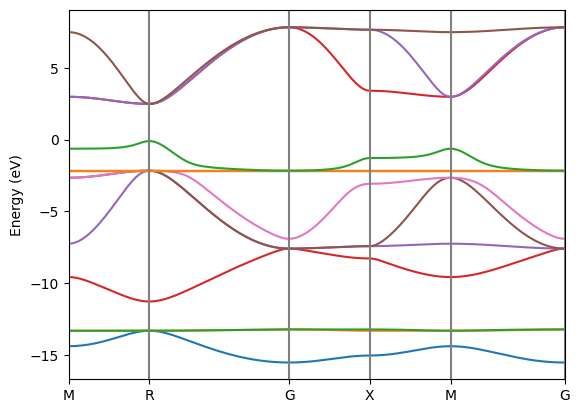

In [3]:
from automaticTB.examples.kpaths import cubic_kpath
from automaticTB.properties import BandStructureResult
import os

filename = "HalidePerovskite.pdf"

print("Plot the bandstructure")
band_result = BandStructureResult.from_tightbinding_and_kpath(tb, cubic_kpath)
band_result.plot_data(filename)
